# Подготовка данных по недвижимости

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Рассмотрим датасет

In [2]:
df = pd.read_csv('/home/user/ds_bootcamp/real_estate/_data.csv')
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

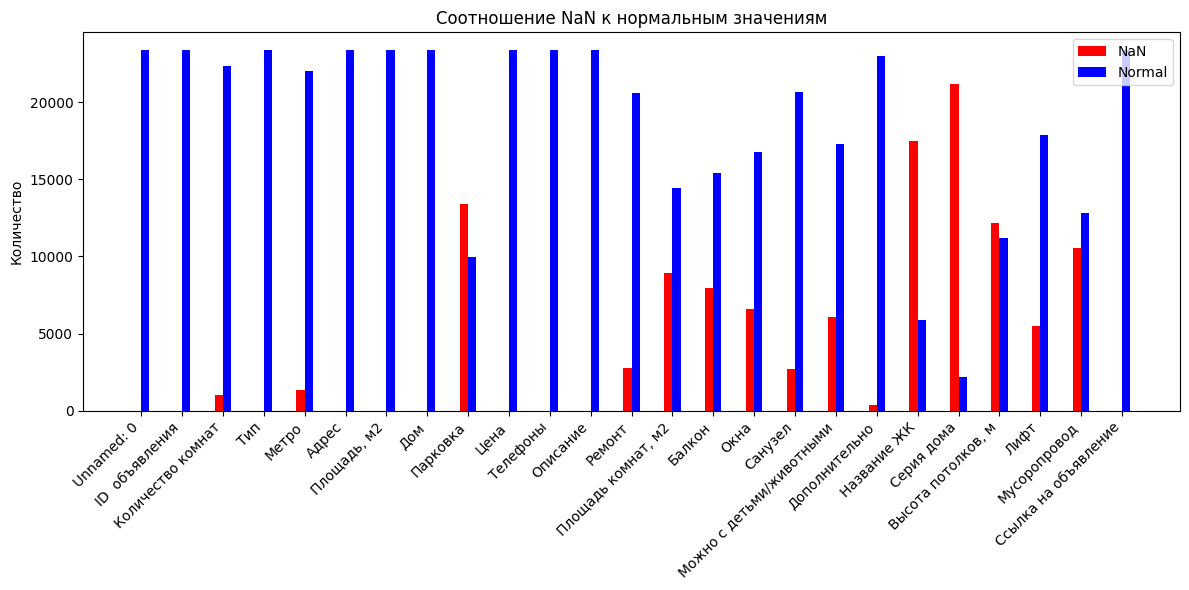

In [4]:
nan_df = df.isna().sum()
normal_df = df.notna().sum()
%matplotlib inline
plt.figure(figsize=(12, 6))
width = 0.2
indices = range(len(df.columns))

plt.bar(indices, nan_df, width=width, label='NaN', color='red')
plt.bar([i + width for i in indices], normal_df, width=width, label='Normal', color='blue')

plt.ylabel('Количество')
plt.title('Соотношение NaN к нормальным значениям')
plt.xticks([i + width / 2 for i in indices], df.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Общее количество объявлений (23368) отличается от количества значений по ряду признаков (минимальное - 2163 по серии дома, 5848 по названию ЖК). Есть пропуски, требующие обработки. Дубликатов нет. Есть ряд признаков числового типа, у которых нужно изменить тип данных. 

## Изучим данные по признакам

### 'Unnamed: 0' 

Дублирует индексы, не нужен для разработки модели. К удалению

### Комнаты

In [5]:
for i in df['Количество комнат'].unique(): # Уникальные значения по комнатам
    print(i)

4
4, Оба варианта
2
3
5, Оба варианта
3, Изолированная
5
5, Изолированная
2, Оба варианта
3, Оба варианта
6
1
4, Изолированная
6, Оба варианта
2, Изолированная
nan
2, Смежная
4, Смежная
3, Смежная
6, Изолированная
1, Изолированная
1, Оба варианта
5, Смежная
6, Смежная
1, Смежная


In [6]:
print(df['Количество комнат'].isna().sum()) # Подсчет пропусков по количеству комнат

1041


Есть 1041 пропуск по комнатам, нужно преобразовать данные в числовой вид, убрать текстовую часть.

### Тип

In [7]:
df['Тип'].unique() # Уникальные значения по типу

array(['Квартира'], dtype=object)

In [8]:
print(df['Тип'].isna().sum()) # Подсчет пропусков по количеству комнат

0


Поскольку один тип значений - он не повлияет на модель, но может усложнить расчет, признак к удалению.

### Метро

In [9]:
df['Метро'].unique() # Уникальные значения по типу

array(['м. Смоленская (9 мин пешком)', 'м. Смоленская (8 мин пешком)',
       'м. Смоленская (7 мин пешком)', ...,
       'м. Боровское шоссе (5 мин на машине)',
       'м. Говорово (2 мин пешком)', 'м. Солнцево (5 мин на машине)'],
      dtype=object)

In [10]:
print(df['Метро'].isna().sum()) # Подсчет пропусков по метро

1315


Потребуется удалить текстовую часть, связанную с расстоянием от метро, т.к. модель будет некорректно обрабатывать такие значения. 1315 квартир не имеют информации о метро. Информация существенная для анализа цены, нельзя заменить случайными значениями. 

Условно возможная альтернатива сохранения использовать информацию по таким квартирам - для всего массива данных выделить из адреса отдельный столбец с улицой и использовать при обучении модели. Однако, есть протяженные улицы, распространяющиеся на целую ветку метро, на текущем этапе корректнее будет удалить данные по квартирам с пропуском метро

### Адрес

In [11]:
df['Адрес'].unique() # Рассмотрим вид адреса

array(['Москва, улица Новый Арбат, 27',
       'Москва, переулок Плотников, 21С1',
       'Москва, улица Новый Арбат, 15', ...,
       'Москва, Солнцевский проспект, 26К1, ш. Боровское (4 км до МКАД), ш. Киевское (7 км до МКАД)',
       'Москва, Солнцевский проспект, 19, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)',
       'Москва, Боровский проезд, 11'], dtype=object)

In [12]:
print(df['Адрес'].isna().sum())

0


Оставляем значения как есть, пропусков нет

### Площадь

In [13]:
df['Площадь, м2'].unique()

array(['200.0/20.0', '198.0/95.0/18.0', '200.0/116.0/4.0', ..., '43.1',
       '52.5/10.0', '90.0/48.2/15.5'], dtype=object)

In [14]:
print(df['Площадь, м2'].isna().sum())

0


Нужно убрать площадь комнат, оставить только общую, преобразовать в тип данных float

Видим, что большинство квартир в выборке - до 100 м2.

### Дом

In [15]:
df['Дом'].unique()

array(['5/16, Монолитный', '5/16, Монолитно-кирпичный', '5/16', ...,
       '10/23, Монолитно-кирпичный', '12/23, Панельный', '12/25, Блочный'],
      dtype=object)

In [16]:
print(df['Дом'].isna().sum())

0


На следующем этапе разобьем на три признака - этаж, этажность, тип дома. Гипотеза: все эти признаки будут влиять на качество работы модели.

### Парковка

In [17]:
df['Парковка'].unique()

array(['подземная', nan, 'наземная', 'открытая', 'многоуровневая',
       'на крыше'], dtype=object)

In [18]:
print(df['Парковка'].isna().sum())

13417


Нет данных по парковке более чем по половине квартир. Предполагаем, что там нет парковки, так и заполним.

### Цена

In [19]:
df['Цена'].unique()

array(['500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
       '500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес',
       '400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес',
       ...,
       '48000.0 руб./ За месяц, Залог - 40000 руб., Коммунальные услуги включены, Срок аренды - На несколько месяцев, Предоплата 1 мес',
       '39000.0 руб./ За месяц, Залог - 40000 руб., Коммунальные услуги включены, Срок аренды - На несколько месяцев, Предоплата 1 мес',
       '55000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 2 мес'],
      dtype=object)

In [20]:
print(df['Цена'].isna().sum())

0


Разобьем на несколько признаков на следующем этапе.

### Телефоны

In [21]:
df['Телефоны'].unique()

array(['+79166369231', '+79850608590', '+79672086536, +79099269384', ...,
       '+79653825192', '+79660611965', '+79623641533'], dtype=object)

Номера телефонов не будут влиять на качество модели. К удалению.

### Описание

In [22]:
df['Описание'].unique()

array(['Без комиссии для нанимателя! Бонус коллегам 125.000 руб! Предлагается роскошная четырехкомнатная квартира в ЖК Новый Арбат. \nКвартира укомплектована мебелью и техникой премиум-класса. Кондиционирование, теплые полы. \n\nФункциональная планировка: изолированная кухня, гостиная, три спальни, два совмещенных санузла с ванной и душем, гардеробная, прихожая с гостевым санузлом и постирочной. \n\nДом находится под круглосуточной охраной. В подземном паркинге в стоимость включено 1 м/м. Рядом есть вся необходимая инфраструктура., 26 фото',
       'Лот 93107. Елена Анисимова.\n\nБонус агенту 50%.\n\nБез комиссии для арендатора.\n\nСтильная 4-комнатная квартира в элитном доме 5 / 16 этаж. Спален: 3, санузлов: 3. Общая площадь: 198 кв.м. Комнаты: 25-25-20-25 кв.м. Кухня: 18 кв.м. Высота потолков 3.5 м. Ремонт в уникальном авторском стиле. Квартира полностью с мебелью, вывоз обсуждается. Огороженная, охраняемая территория. Подземный паркинг, машиноместо входит в стоимость. Окна выходят н

In [23]:
print(df['Описание'].isna().sum())

0


Модель обучения может идти по тексту, оставим как есть. Описание есть у всех квартир в выборке.

### Ремонт

In [24]:
df['Ремонт'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта'],
      dtype=object)

In [25]:
print(df['Описание'].isna().sum())

0


Пропуски по ремонту могут быть разными по смыслу. Заменим на отсутствие данных (н/д). Гипотеза: ремонт может существенно влиять на цену

### Площадь комнат, м2

In [26]:
df['Площадь комнат, м2'].unique()

array([nan, '25 25 20 25', '14-42-20-19', ..., '22-16-30', '32+13,6-18,7',
       '26,2+15,5-22,0'], dtype=object)

Данные не могут быть использованы, поскольку имеют разный формат перечисления, требуют проверки на соответствие общей площади. Возможны ошибки в указании площади (0 м2, 2 м2), есть дробные части через запятую, есть перечисления через запятую.